# Using Historical Data to Predict Batting Success: Step 3 - Hall Of Fame Modelling

Authored by: Donna J. Harris (994042890)

Email: harr2890@mylaurier.ca

For: CP640 Machine Learning (S22) with Professor Elham Harirpoush

## Notebook Series

Just a word about the presentation of this project code.

The code is organized into a series of locally executed Jupyter notebooks, organized by step and needing to be executed in sequence. This is `harr2890_project_step3_hof_modelling`, the third of XXXXX notebooks.  TODO

## *Step 3 - Exploration and Modelling for a Hall of Fame Approach*

word words word TODO


## Environment Setup

Import and establish environment for our work, including showing all dataframe column values.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

### Pre-Conditions

Steps 1-2 must be run completely before running this notebook.

The `data` folder must exist with the following prepared data files:
- `./data/step2_pre_2000.csv`
- `./data/step2_from_2000.csv`

##  Loading Prepared Data Files

In [2]:
pre_2000_csv = "./data/step2_pre_2000.csv"
pre_2000 = pd.read_csv(pre_2000_csv)
pre_2000

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS,Inductee
0,aaronha01,Henry Aaron,2898,2652,450,846,149,37,125,440,199,237,9,18,20,0.319005,0.544495,0.365972,0.910467,1
1,abreubo01,Bobby Abreu,2165,1829,312,572,117,29,65,273,316,413,5,4,11,0.312739,0.515036,0.413235,0.928270,0
2,adamsbu01,Buster Adams,2084,1821,259,487,85,11,48,234,208,255,13,42,0,0.267435,0.405272,0.346719,0.751991,0
3,adamssp01,Sparky Adams,2263,2025,300,591,87,17,7,148,167,75,14,40,0,0.291852,0.361975,0.349955,0.711930,0
4,adcocjo01,Joe Adcock,2425,2235,273,632,114,20,72,322,156,232,7,23,4,0.282774,0.448322,0.330974,0.779296,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,younger01,Eric Young Sr.,2051,1784,306,528,74,22,25,193,205,127,32,18,12,0.295964,0.404148,0.376291,0.780439,0
665,yountro01,Robin Yount,2869,2647,306,717,118,23,26,252,148,307,5,47,22,0.270873,0.362297,0.308292,0.670589,1
666,zarilal01,Al Zarilla,2014,1796,224,499,88,25,27,216,161,183,15,42,0,0.277840,0.399777,0.342292,0.742069,0
667,zeileto01,Todd Zeile,2462,2152,278,571,118,12,51,297,276,331,7,1,26,0.265335,0.402416,0.347013,0.749430,0


In [3]:
from_2000_csv = "./data/step2_from_2000.csv"
from_2000 = pd.read_csv(from_2000_csv)
from_2000

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS,Inductee
0,abreujo02,José Abreu,3213,2913,398,858,180,13,146,488,209,624,67,0,24,0.294542,0.515620,0.352941,0.868561,0
1,ackledu01,Dustin Ackley,2277,2064,255,503,94,18,46,212,186,410,5,11,11,0.243702,0.373547,0.306267,0.679813,0
2,albieoz01,Ozzie Albies,2440,2243,365,613,137,25,90,311,163,422,16,2,16,0.273295,0.477040,0.324856,0.801896,0
3,altuvjo01,Jose Altuve,2932,2721,341,830,162,14,36,226,146,308,24,17,24,0.305035,0.414553,0.343053,0.757607,0
4,alvarpe01,Pedro Alvarez,2293,2063,240,484,90,6,104,324,211,678,9,1,9,0.234610,0.435288,0.307155,0.742444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,youklke01,Kevin Youkilis,2269,1922,325,555,138,8,66,314,277,397,42,0,28,0.288762,0.471904,0.385192,0.857096,0
230,youngch04,Chris Young,2566,2281,328,549,136,14,98,296,244,596,14,11,16,0.240684,0.441473,0.315851,0.757324,0
231,youngde03,Delmon Young,2464,2311,288,675,137,8,59,344,102,429,23,1,27,0.292081,0.434877,0.324807,0.759684,0
232,youngmi02,Michael Young,2516,2317,353,666,110,30,56,282,147,396,5,25,22,0.287441,0.433319,0.328382,0.761701,0


**NOTE:** The `from_2000` data contains _no_ players who are currently in the Hall of Fame. This is part of what will make it an interesting source of data for independent testing.

In [4]:
from_2000[from_2000['Inductee']==1]

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS,Inductee


## Extract X and y Data from `pre_2000`

`pre_2000` has 1514 records. This is the data we will be focusing on for training and validating the model.

`pre_2000` has 21 columns, the first two (`ID` and `Player`) are for identification purposes and last column (`Inductee`) is our label. This leaves 18 feature columns for consideration. Also, note that four of the columns (the calculated statistics) are based on other features in the data.

We can extract those 18 feature columns into `X`:

In [5]:
num = pre_2000.shape[1]
X = pre_2000[pre_2000.columns[2:num-1]]  # removes ID, and Player
X

,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,AVG,SLG,OBP,OPS
0,2898,2652,450,846,149,37,125,440,199,237,9,18,20,0.319005,0.544495,0.365972,0.910467
1,2165,1829,312,572,117,29,65,273,316,413,5,4,11,0.312739,0.515036,0.413235,0.928270
2,2084,1821,259,487,85,11,48,234,208,255,13,42,0,0.267435,0.405272,0.346719,0.751991
3,2263,2025,300,591,87,17,7,148,167,75,14,40,0,0.291852,0.361975,0.349955,0.711930
4,2425,2235,273,632,114,20,72,322,156,232,7,23,4,0.282774,0.448322,0.330974,0.779296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,2051,1784,306,528,74,22,25,193,205,127,32,18,12,0.295964,0.404148,0.376291,0.780439
665,2869,2647,306,717,118,23,26,252,148,307,5,47,22,0.270873,0.362297,0.308292,0.670589
666,2014,1796,224,499,88,25,27,216,161,183,15,42,0,0.277840,0.399777,0.342292,0.742069
667,2462,2152,278,571,118,12,51,297,276,331,7,1,26,0.265335,0.402416,0.347013,0.749430


We capture the column/feature names into `X_features`:

In [6]:
X_features = X.columns.values.tolist()
X_features

['PA',
 'AB',
 'R',
 'H',
 '2B',
 '3B',
 'HR',
 'RBI',
 'BB',
 'SO',
 'HBP',
 'SH',
 'SF',
 'AVG',
 'SLG',
 'OBP',
 'OPS']

And, finally, modify the format of `X` to be an array ready for working with `scikit-learn`.

In [7]:
X = X.values
X

array([[2.89800000e+03, 2.65200000e+03, 4.50000000e+02, ...,
        5.44494721e-01, 3.65972222e-01, 9.10466943e-01],
       [2.16500000e+03, 1.82900000e+03, 3.12000000e+02, ...,
        5.15035539e-01, 4.13234614e-01, 9.28270152e-01],
       [2.08400000e+03, 1.82100000e+03, 2.59000000e+02, ...,
        4.05271829e-01, 3.46718903e-01, 7.51990732e-01],
       ...,
       [2.01400000e+03, 1.79600000e+03, 2.24000000e+02, ...,
        3.99777283e-01, 3.42292089e-01, 7.42069372e-01],
       [2.46200000e+03, 2.15200000e+03, 2.78000000e+02, ...,
        4.02416357e-01, 3.47013409e-01, 7.49429766e-01],
       [2.67300000e+03, 2.41700000e+03, 3.57000000e+02, ...,
        5.01861812e-01, 3.46182635e-01, 8.48044447e-01]])

Similarly for `y`, we'll extract the label column:

In [8]:
y = pre_2000[['Inductee']]
y

,Inductee
0,1
1,0
2,0
3,0
4,0
...,...
664,0
665,1
666,0
667,0


Extract the label name:

In [9]:
y_label_name = y.columns.values.tolist()
y_label_name

['Inductee']

Then, finally, prepare `y` for use with `scikit-learn`.

In [10]:
y = pre_2000[y_label_name[0]].values
y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

Before moving on, let's take a look at the breakdown between the number of Hall of Fame inductees in this dataset versus those who are not in the Hall of Fame.

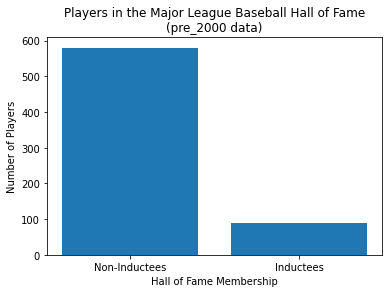

Number of Inductees:  89
Number of Non-Inductees:  580


In [11]:
import matplotlib.pyplot as plt

data = [len(pre_2000[pre_2000['Inductee']==0]), len(pre_2000[pre_2000['Inductee']==1])]
plt.title("Players in the Major League Baseball Hall of Fame\n(pre_2000 data)")
plt.xlabel("Hall of Fame Membership")
plt.ylabel("Number of Players")
plt.bar(['Non-Inductees','Inductees'], data)

plt.show()

print("Number of Inductees: ", len(pre_2000[pre_2000['Inductee']==1]))
print("Number of Non-Inductees: ", len(pre_2000[pre_2000['Inductee']==0]))

As one might expect, we can see that there are far more players not in the Hall of Fame than those who are. Part of the reason we added a minimum number of plate appearances in Step 2 was to lessen the divide between non-inductees and inductees. It is still a fairly large gap as it is a special honour, indeed.

### Getting X and y `from_2000` data

Before going any further, part of the approach for this project is also to look at more recent player data, found in the `from_2000` dataset. So, let's extract values for `X_2000` and `y_2000` data for testing.

In [12]:
num = from_2000.shape[1]
X_2000 = from_2000[from_2000.columns[2:num-1]]
X_2000_features = X_2000.columns.values.tolist()
X_2000 = X_2000.values

y_2000 = pre_2000[['Inductee']]
y_2000_label_name = y_2000.columns.values.tolist()
y_2000 = pre_2000[y_label_name[0]].values

For later, we also want to isolate the names of players in the `from_2000` data for further testing.

In [13]:
from_2000_names = from_2000['Player']
from_2000_names

0          José Abreu
1       Dustin Ackley
2        Ozzie Albies
3         Jose Altuve
4       Pedro Alvarez
            ...      
229    Kevin Youkilis
230       Chris Young
231      Delmon Young
232     Michael Young
233    Ryan Zimmerman
Name: Player, Length: 234, dtype: object

### Functions for Later Use

The following is a function to print out the predicted names from the `from_2000` data, based on the `y` array of Hall of Fame predictions. Keeping in mind that the `from_2000` data will be completely unseen.

In [14]:
def get_hall_of_fame_predictions(y_predictions):
    predictions = []
    i = 0
    for pred in y_predictions:
        if pred == 1:
            predictions.append(i)
        i += 1
        
    return predictions

In [ ]:
def get_hall_of_fame_predictions_pca(y_predictions):
    predictions = []
    i = 0
    for pred in y_predictions:
        if pred == 1:
            predictions.append(i)
        i += 1
        
    return predictions

In [15]:
def print_predictions(y_predictions):
    if len(y_predictions) == 0:
        print("Empty player list.")
    else:
        for player in y_predictions:
            print(from_2000_names[player])

The following is a model evaluation function that will be used throughout the notebook.

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)


def print_results(model, train_x, train_y, predicted_train_y, test_x, test_y, predicted_test_y):
    print("Model Performance")

    # training
    display = ConfusionMatrixDisplay.from_estimator(
        model,
        train_x,
        train_y,
        display_labels=['Non-Inductee', 'Inductee'],
        cmap=plt.cm.YlGn
    )
    display.ax_.set_title("Confusion Matrix - Training Data")

    plt.show()

    # test
    display = ConfusionMatrixDisplay.from_estimator(
        model,
        test_x,
        test_y,
        display_labels=['Non-Inductee', 'Inductee'],
        cmap=plt.cm.YlGn
    )
    display.ax_.set_title("Confusion Matrix - Test Data")

    plt.show()

    print('Accuracy of the model for training set: %.3f' % accuracy_score(train_y, predicted_train_y))
    print('Accuracy of the model for test set: %.3f\n' % accuracy_score(test_y, predicted_test_y))

    print('Precision of the model for training set: %.3f' % precision_score(train_y, predicted_train_y))
    print('Precision of the model for test set: %.3f\n' % precision_score(test_y, predicted_test_y))

    print('Recall of the model for training set: %.3f' % recall_score(train_y, predicted_train_y))
    print('Recall of the model for test set: %.3f\n' % recall_score(test_y, predicted_test_y))

    print('F1-measure of the model for training set: %.3f' % f1_score(train_y, predicted_train_y))
    print('F1-measure of the model for test set: %.3f\n' % f1_score(test_y, predicted_test_y))

    
    precision, recall, _ = precision_recall_curve(train_y, predicted_train_y)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot()
    plt.title("Precision-Recall Curve - Training Data")
    plt.grid()
    plt.show()
    
    
    precision, recall, _ = precision_recall_curve(test_y, predicted_test_y)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot()
    plt.title("Precision-Recall Curve - Test Data")
    plt.grid()
    plt.show()

## Taking Steps Toward a Model

Using `pre_2000` for model training and validation.

`pre_2000` has 20 columns, the first two (`'ID'` and `'Player'`) are for identification purposes and last column (`'Inductee'`) is our label. This leaves 17 feature columns for consideration.

Also, note that four of the columns (the calculated statistics) are based on other features in the data. We may return to remove the calcuated statistics later on.

With so many dimensions, we should investigate reducing dimensionality in order to avoid overfitting. 

### Model 0 (M0): Logistic Regression w/scaling

Model 0 (M0) is a simple logistic regression approach, using all 17 features and scaling, but without dimension reduction.

We start with logistic regression because this is a binary classification problem.

Model Performance


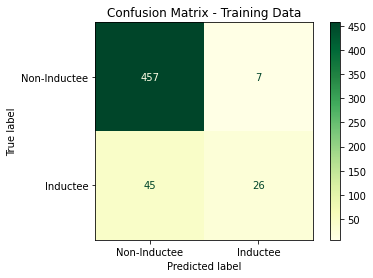

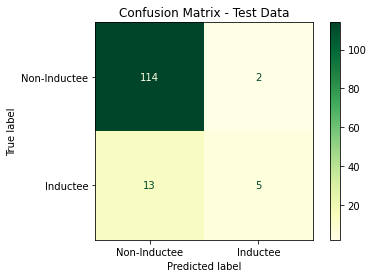

Accuracy of the model for training set: 0.903
Accuracy of the model for test set: 0.888

Precision of the model for training set: 0.788
Precision of the model for test set: 0.714

Recall of the model for training set: 0.366
Recall of the model for test set: 0.278

F1-measure of the model for training set: 0.500
F1-measure of the model for test set: 0.400



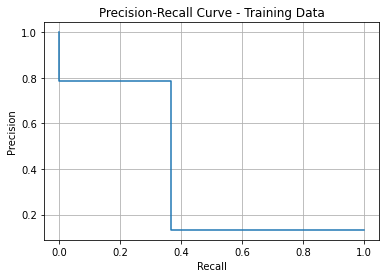

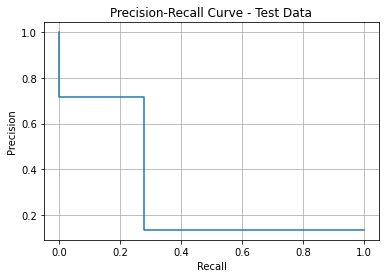

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X0 = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X0, y, test_size = 0.2, random_state = 42)

M0 = LogisticRegression(solver = 'liblinear')
M0.fit(X_train, y_train)
y_train_predict = M0.predict(X_train)
y_test_predict = M0.predict(X_test)

print_results(M0, X_train, y_train, y_train_predict, X_test, y_test, y_test_predict)

At a first glance, the evaluation metrics seem promising. Accuracy is hovering around 90% and there are a lot of correctly identified non-inductees.

However, considering the domain, we have already run into a number of problems:

1. We know there are considerably more non-inductees than inductees, even a very poor model that says "nobody is an inductee" will have pretty high accuracy. As a result, accuracy on its own is not a good measure for performance.

2. It is very much expected to have a number of non-inductees identified as inductees. There are at two common reasons for this: a) the player has not yet been voted into the Hall of Fame (but could likely be one day, once they are eligible, voted in, etc.), and b) the player has amazing results on paper, but had external issues that will likely prevent their overall qualification and acceptance into the Hall of Fame.

The statistic of focus here is best represented by the _Recall_ statistic which, in this context, evaluates how well the model correctly identifies players who are in the Hall of Fame already.

It is a concern that our model has such a _Recall_ value, with the training set only correctly choosing those players 36.7% of the time, and less (27.8%) in the test set.

When we exercise our "independent test set", we can see that this model predicts nobody, which is disappointing.

In [18]:
pred0 = get_hall_of_fame_predictions(M0.predict(X_2000))
print_predictions(pred0)

José Abreu
Dustin Ackley
Ozzie Albies
Jose Altuve
Pedro Alvarez
Tim Anderson
Elvis Andrus
Nori Aoki
Nolan Arenado
Garrett Atkins
Darwin Barney
Jason Bay
Gordon Beckham
Cody Bellinger
Josh Bell
Brandon Belt
Andrew Benintendi
Yuniesky Betancourt
Mookie Betts
Hank Blalock
Xander Bogaerts
Michael Brantley
Ryan Braun
Alex Bregman
Ben Broussard
Jay Bruce
Kris Bryant
Pat Burrell
Billy Butler
Asdrubal Cabrera
Melky Cabrera
Miguel Cabrera
Kole Calhoun
Robinson Cano
Jorge Cantu
Matt Carpenter
Nick Castellanos
Jose Castillo
Starlin Castro
Yoenis Céspedes
Matt Chapman
Michael Conforto
Carlos Correa
Zack Cozart
Brandon Crawford
Carl Crawford
Coco Crisp
C.J. Cron
Ike Davis
Khris Davis
David DeJesus
Paul DeJong
Ian Desmond
Rafael Devers
Corey Dickerson
Josh Donaldson
Brian Dozier
Stephen Drew
Adam Dunn
Adam Eaton
David Eckstein
Mark Ellis
Jacoby Ellsbury
Edwin Encarnacion
Yunel Escobar
Andre Ethier
Prince Fielder
Chone Figgins
Dexter Fowler
Jeff Francoeur
Maikel Franco
Todd Frazier
Freddie Freeman
Ko

In [19]:
if len(X_2000) == len(pred0):
    print("The model predicted the entire list as inductees.")

The model predicted the entire list as inductees.


We know that's not feasible!

In my explorations and experimentation, I discovered that _*not*_ scaling had some surprising results.

### Model 1 (M1): Logistic Regression with no scaling

Model 1 is exactly like Model 0, only without scaling.

Model Performance


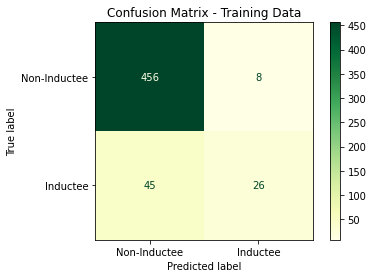

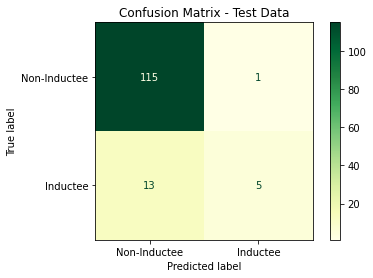

Accuracy of the model for training set: 0.901
Accuracy of the model for test set: 0.896

Precision of the model for training set: 0.765
Precision of the model for test set: 0.833

Recall of the model for training set: 0.366
Recall of the model for test set: 0.278

F1-measure of the model for training set: 0.495
F1-measure of the model for test set: 0.417



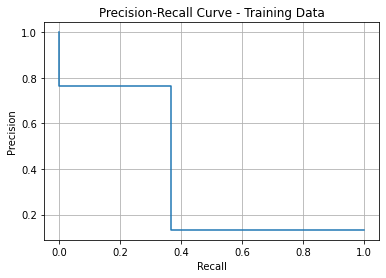

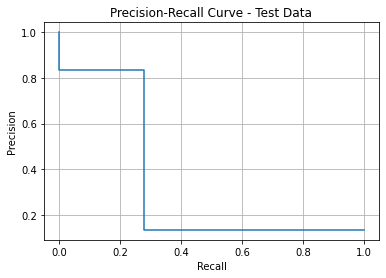

In [20]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

M1 = LogisticRegression(solver = 'liblinear')
M1.fit(X_train, y_train)
y_train_predict = M1.predict(X_train)
y_test_predict = M1.predict(X_test)

print_results(M1, X_train, y_train, y_train_predict, X_test, y_test, y_test_predict)

Interestingly, the results appear the same, but when we try the independent test again:

In [21]:
pred1 = get_hall_of_fame_predictions(M1.predict(X_2000))
print_predictions(pred1)

Ryan Braun
Juan Pierre
Albert Pujols
Ichiro Suzuki
Mike Trout


This time, we have a list of five players and at least three of these players are highly likely to be inducted into the Hall of Fame in the coming years. (Albert Pujols, Ichiro Suzuki, and Mike Trout.) On paper, Ryan Braun is also a candidate, so one would expect the model to suggest him -- although other factors may prevent his induction. And, Juan Pierre was a solid player but today is not generally considered a future Hall of Famer.

What does this tell us? Despite the dismal _Recall_ score, this unscaled model does a much better job of identifying candidates based on their earliest season's batting peformance than the scaled model.

### M2 - Logistic Regression using GridSearchCV for Optimization

In [30]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [
    {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] }
]

print("#### Tuning Hyper-Parameters for Recall")
print()

clf = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, scoring="recall")
clf.fit(X, y)

print("Best parameters on dataset (X):",clf.best_params_)
print("\nGrid scores on dataset (X):")
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("\t%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print("\n\n")
    

#### Tuning Hyper-Parameters for Recall

Best parameters on dataset (X): {'C': 0.01}

Grid scores on dataset (X):
	0.248 (+/-0.126) for {'C': 0.0001}
	0.293 (+/-0.092) for {'C': 0.001}
	0.326 (+/-0.112) for {'C': 0.01}
	0.304 (+/-0.096) for {'C': 0.1}
	0.304 (+/-0.096) for {'C': 1}
	0.326 (+/-0.112) for {'C': 10}
	0.326 (+/-0.112) for {'C': 100}
	0.326 (+/-0.112) for {'C': 1000}





Now, let's create Model 2 (M2) with this value of C to discover if there are any improvements.

Model Performance


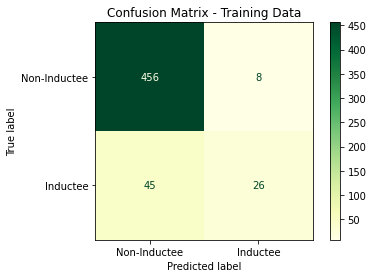

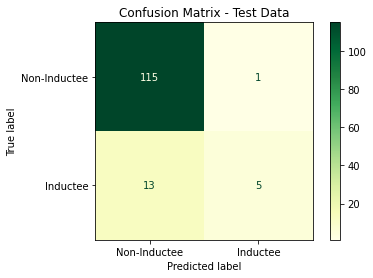

Accuracy of the model for training set: 0.901
Accuracy of the model for test set: 0.896

Precision of the model for training set: 0.765
Precision of the model for test set: 0.833

Recall of the model for training set: 0.366
Recall of the model for test set: 0.278

F1-measure of the model for training set: 0.495
F1-measure of the model for test set: 0.417



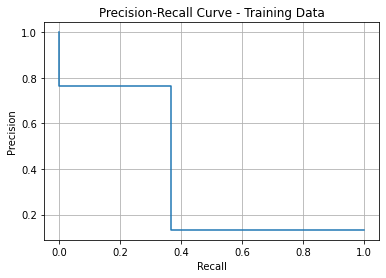

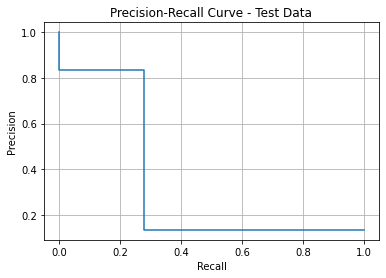

In [31]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

M2 = LogisticRegression(solver='liblinear', C=0.01)
M2.fit(X_train, y_train)
y_train_predict = M2.predict(X_train)
y_test_predict = M2.predict(X_test)

print_results(M2, X_train, y_train, y_train_predict, X_test, y_test, y_test_predict)

The metrics for _Recall_ did not change, but let's try the independent test again:

In [32]:
pred2 = get_hall_of_fame_predictions(M2.predict(X_2000))
print_predictions(pred2)

Albert Pujols
Ichiro Suzuki
Mike Trout


Intriguingly, the model has changed and our predicted inductees are three players who very likely to be inducted in the future.

However, our problem remains. While the model seems to be improving some small ways, we have yet to significantly improve the _Recall_ rate. We are still only classifying 27.8% of our test data inductees correctly.

### Model 3 - Logistic Regression and Cross Validation

Let's take a quick look at the cross-validation scores across the entire pre-2000 dataset:

In [79]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

M3 = LogisticRegression(solver = 'liblinear', C=0.01)
M3.fit(X, y)

scores = cross_val_score(M3, X, y, scoring='recall', cv = 10)
print(scores)

print("\nAverage score: ",np.mean(scores))

[0.11111111 0.22222222 0.33333333 0.44444444 0.22222222 0.44444444
 0.44444444 0.22222222 0.33333333 0.375     ]

Average score:  0.31527777777777777


We can see nothing is shifting. It's time to consider other options.

### Feature Reduction

First, let's consider dimensionality reduction with Primary Component Analysis (PCA).

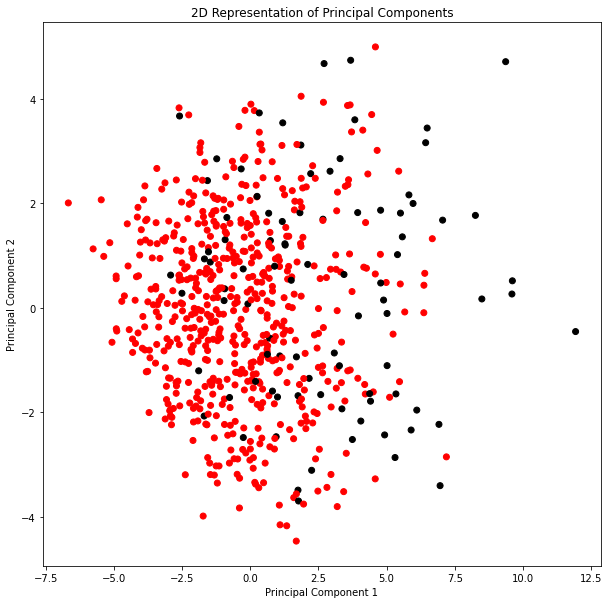

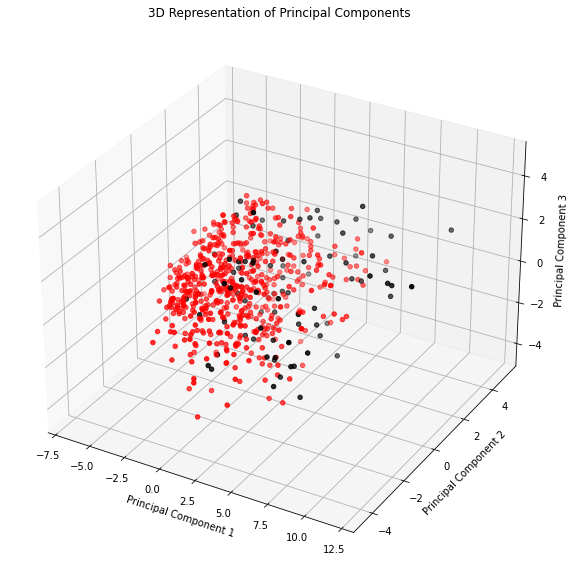

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

principal = PCA(n_components = 3)
principal.fit(X_scaled)
X_scaled = principal.transform(X_scaled)

X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)


# 2D
plt.figure(figsize=(10, 10))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y, cmap='flag')
plt.title('2D Representation of Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print("\n")

# 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2], c=y, cmap='flag')
axis.set_title('3D Representation of Principal Components')
axis.set_xlabel("Principal Component 1")
axis.set_ylabel("Principal Component 2")
axis.set_zlabel("Principal Component 3")
plt.show()

We're not seeing any real separation of classes here, which makes some sense considering the domain. We know that there are lots of players making it into the Hall of Fame based on any number of criteria (or not inducted) and these factors are not reflected in the data we're working with.

So, this may be a moment to acknowledge how flawed this approach is for predicting  future batting success.

However, let's try one more experiment before moving onto another approach entirely.

Let's try another way to improve the _Recall_ results by reducing the nunmber of features in our model. We'll try to determine feature importance using a Random Forest Classifier.

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)


from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Next, we glean the importances from the forest classifier, first using a "Mean Decrease in Impurity" (or MDI) approach.

In [89]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

Finally, we can examine feature importances visually.

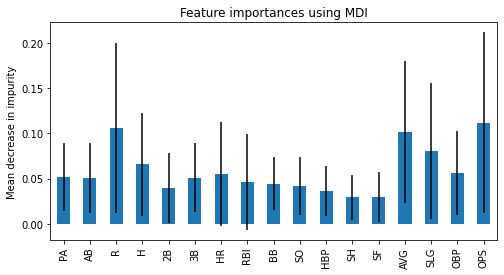

In [90]:
forest_importances = pd.Series(importances, index=X_features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

fig.set_figwidth(8)
fig.set_figheight(4)

By inspection, we can see that `'OPS'`, `'AVG'`, `'R'`, `'SLG'`, and `'H'` are the top five features.

In [100]:
X_reduced1_features = ['OPS', 'AVG', 'R', 'SLG', 'H']
X_reduced1 = pre_2000[X_reduced1_features].values
X_reduced1

array([[9.10466943e-01, 3.19004525e-01, 4.50000000e+02, 5.44494721e-01,
        8.46000000e+02],
       [9.28270152e-01, 3.12739202e-01, 3.12000000e+02, 5.15035539e-01,
        5.72000000e+02],
       [7.51990732e-01, 2.67435475e-01, 2.59000000e+02, 4.05271829e-01,
        4.87000000e+02],
       ...,
       [7.42069372e-01, 2.77839644e-01, 2.24000000e+02, 3.99777283e-01,
        4.99000000e+02],
       [7.49429766e-01, 2.65334572e-01, 2.78000000e+02, 4.02416357e-01,
        5.71000000e+02],
       [8.48044447e-01, 2.77203144e-01, 3.57000000e+02, 5.01861812e-01,
        6.70000000e+02]])

In [107]:
X_2000_reduced1 = from_2000[X_reduced1_features].values

Let's also try manually simplifying the data by removing the calculated statistics from the feature data: `'AVG'`, `'SLG'`, `'OBP'`, and `'OPS'` and then running the analysis again. (All of these have meaning in terms of understanding aspects of a player's performance, but they are all calculated from features we already have so perhaps removal of this will help in some way.)

### Extraction of X, excluding the calculated statistics

In [91]:
num = pre_2000.shape[1]
X_nc = pre_2000[pre_2000.columns[2:num-5]]

X_nc

,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF
0,2898,2652,450,846,149,37,125,440,199,237,9,18,20
1,2165,1829,312,572,117,29,65,273,316,413,5,4,11
2,2084,1821,259,487,85,11,48,234,208,255,13,42,0
3,2263,2025,300,591,87,17,7,148,167,75,14,40,0
4,2425,2235,273,632,114,20,72,322,156,232,7,23,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,2051,1784,306,528,74,22,25,193,205,127,32,18,12
665,2869,2647,306,717,118,23,26,252,148,307,5,47,22
666,2014,1796,224,499,88,25,27,216,161,183,15,42,0
667,2462,2152,278,571,118,12,51,297,276,331,7,1,26


In [92]:
X_nc_features = X_nc.columns.values.tolist()
X_nc_features

['PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'HBP', 'SH', 'SF']

In [93]:
X_nc = X_nc.values
X_nc

array([[2898, 2652,  450, ...,    9,   18,   20],
       [2165, 1829,  312, ...,    5,    4,   11],
       [2084, 1821,  259, ...,   13,   42,    0],
       ...,
       [2014, 1796,  224, ...,   15,   42,    0],
       [2462, 2152,  278, ...,    7,    1,   26],
       [2673, 2417,  357, ...,   12,    1,    0]])

And, for possible later use, let's also create a corresponding version of the data from the `from_2000` data.

In [94]:
num = from_2000.shape[1]
X_nc_2000 = from_2000[from_2000.columns[2:num-5]]
X_nc_2000_features = X_nc_2000.columns.values.tolist()
X_nc_2000 = X_nc_2000.values

Returning to the feature selection process, let's look at the `X_nc` data with respect to feature performances and see what we discover.

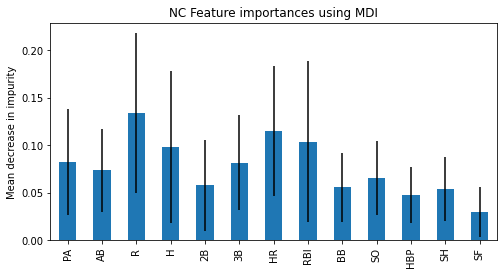

In [95]:
scaler = StandardScaler()
X_nc_scaled = scaler.fit_transform(X_nc)

X_nc_train, X_nc_test, y_train, y_test = train_test_split(X_nc_scaled, y, test_size = 0.2, random_state = 42)

forest = RandomForestClassifier(random_state=42)
forest.fit(X_nc_train, y_train)

nc_importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_nc_importances = pd.Series(nc_importances, index=X_nc_features)

fig, ax = plt.subplots()
forest_nc_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("NC Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

fig.set_figwidth(8)
fig.set_figheight(4)

plt.show()

By inspection, we can see that `'R'`, `'HR'`, `'RBI'`, `'H'`, and `'AB'` are the top five features.

We need to create a reduced version of X, which we'll call `X_reduced`.

In [96]:
X_reduced2_features = ['R', 'HR', 'RBI', 'H', 'AB']
X_reduced2 = pre_2000[X_reduced2_features].values
X_reduced2

array([[ 450,  125,  440,  846, 2652],
       [ 312,   65,  273,  572, 1829],
       [ 259,   48,  234,  487, 1821],
       ...,
       [ 224,   27,  216,  499, 1796],
       [ 278,   51,  297,  571, 2152],
       [ 357,  138,  468,  670, 2417]])

And, let's grab `X_2000_reduced2` for testing later on.

In [106]:
X_2000_reduced2 = from_2000[X_reduced2_features].values

### M4 - Logistic Regression, using set 1 of reduced features

Model Performance


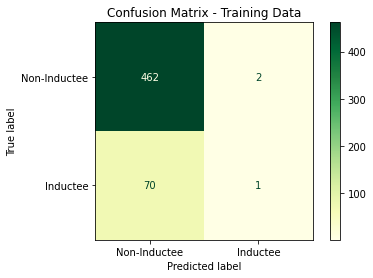

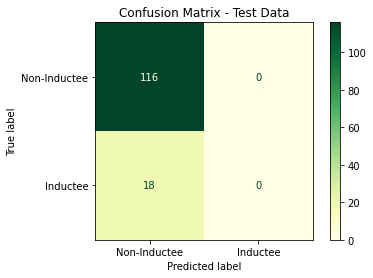

Accuracy of the model for training set: 0.865
Accuracy of the model for test set: 0.866

Precision of the model for training set: 0.333
Precision of the model for test set: 0.000

Recall of the model for training set: 0.014
Recall of the model for test set: 0.000

F1-measure of the model for training set: 0.027
F1-measure of the model for test set: 0.000



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


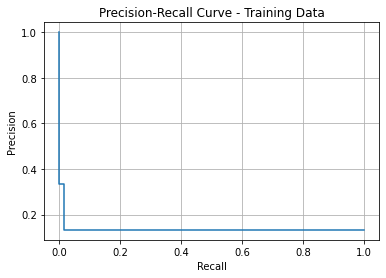

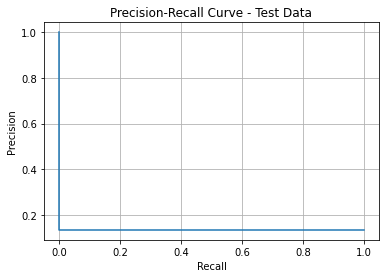

In [101]:
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced1, y, test_size=0.2, random_state=42)

M4 = LogisticRegression(solver = 'liblinear', C=0.01)
M4.fit(X_reduced_train, y_train)

y_train_predict = M4.predict(X_reduced_train)
y_test_predict = M4.predict(X_reduced_test)

print_results(M4, X_reduced_train, y_train, y_train_predict, X_reduced_test, y_test, y_test_predict)

There is definitely something wrong with this model and this set of features. Let's take a look at what we find when we reduce features not including the calculated statistics.

### M5 - Logistic Regression, using set 2 of reduced features

Model Performance


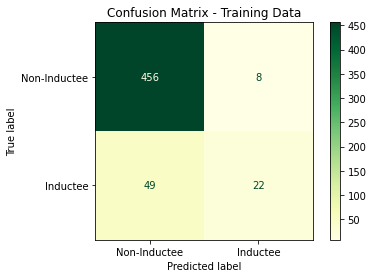

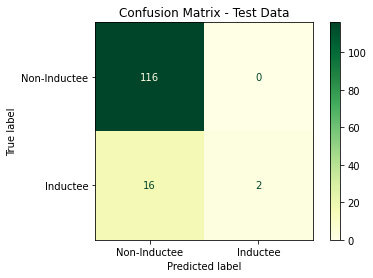

Accuracy of the model for training set: 0.893
Accuracy of the model for test set: 0.881

Precision of the model for training set: 0.733
Precision of the model for test set: 1.000

Recall of the model for training set: 0.310
Recall of the model for test set: 0.111

F1-measure of the model for training set: 0.436
F1-measure of the model for test set: 0.200



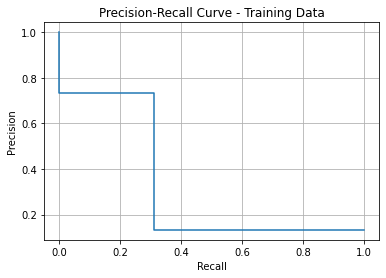

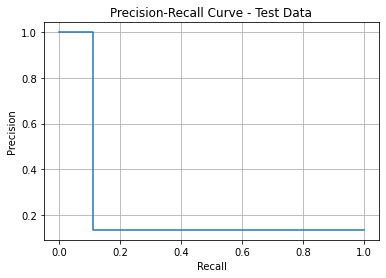

In [102]:
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced2, y, test_size=0.2, random_state=42)

M5 = LogisticRegression(solver = 'liblinear', C=0.01)
M5.fit(X_reduced_train, y_train)

y_train_predict = M5.predict(X_reduced_train)
y_test_predict = M5.predict(X_reduced_test)

print_results(M5, X_reduced_train, y_train, y_train_predict, X_reduced_test, y_test, y_test_predict)

Looking at our independent testing again, using the second list of reduced features:

(Note: there was no point in trying this with the problematic Model 4.)

In [111]:
pred5 = get_hall_of_fame_predictions(M5.predict(X_2000_reduced2))
print_predictions(pred5)

Ryan Braun
Matt Holliday
Albert Pujols
Hanley Ramirez
Ichiro Suzuki
Mike Trout
Joey Votto


This list is slightly longer than others we've seen and has some good likelihood to it. Apart from Hanley Ramirez (who would still get some consideration but isn't at the top of anybody's list based on batting performance), all of these names are serious contenders for induction into the Hall of Fame.

### Model 6 (M6): Support Vector Classifier (using X without calculated statistics)

Model Performance


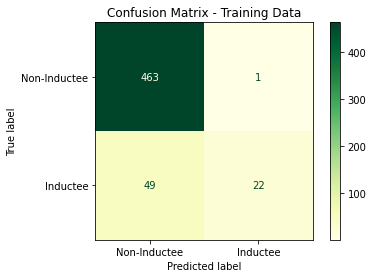

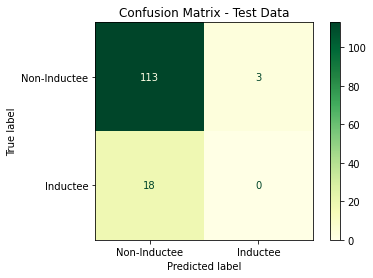

Accuracy of the model for training set: 0.907
Accuracy of the model for test set: 0.843

Precision of the model for training set: 0.957
Precision of the model for test set: 0.000

Recall of the model for training set: 0.310
Recall of the model for test set: 0.000

F1-measure of the model for training set: 0.468
F1-measure of the model for test set: 0.000



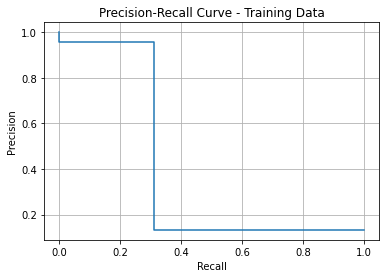

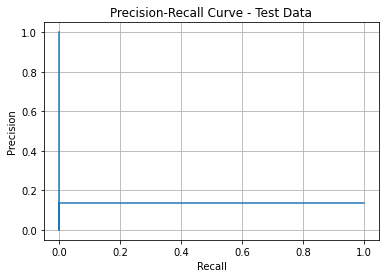

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X6 = scaler.fit_transform(X_nc)

from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X6, y, test_size=0.2, random_state=42)

M6 = svm.SVC(kernel='rbf')
M6.fit(X_train, y_train)



y_train_predict = M6.predict(X_train)
y_test_predict = M6.predict(X_test)


print_results(M6, X_train, y_train, y_train_predict, X_test, y_test, y_test_predict)



In [132]:
pred6 = get_hall_of_fame_predictions(M6.predict(X_nc_2000))
print_predictions(pred6)

Empty player list.


### Model 7 (M7): KNN Classifier (using X without calculated statistics)

Model Performance


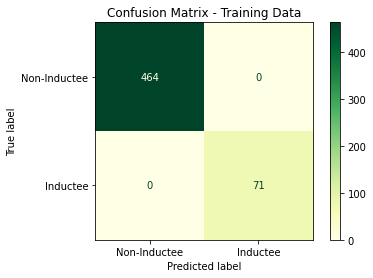

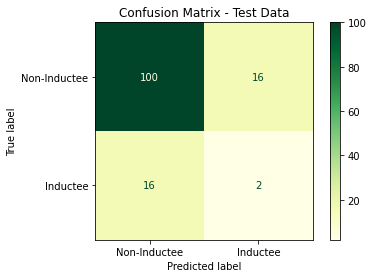

Accuracy of the model for training set: 1.000
Accuracy of the model for test set: 0.761

Precision of the model for training set: 1.000
Precision of the model for test set: 0.111

Recall of the model for training set: 1.000
Recall of the model for test set: 0.111

F1-measure of the model for training set: 1.000
F1-measure of the model for test set: 0.111



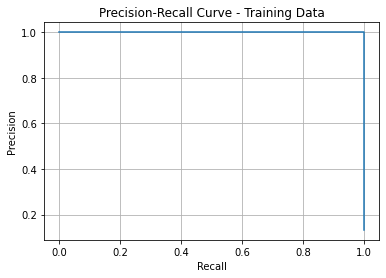

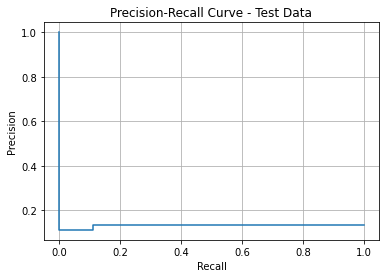

In [150]:
from sklearn.neighbors import KNeighborsClassifier

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X6 = scaler.fit_transform(X_nc)

from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

M7 = KNeighborsClassifier(n_neighbors=1)
M7.fit(X_train, y_train)



y_train_predict = M7.predict(X_train)
y_test_predict = M7.predict(X_test)


print_results(M7, X_train, y_train, y_train_predict, X_test, y_test, y_test_predict)



In [151]:
pred7 = get_hall_of_fame_predictions(M7.predict(X_2000))
print_predictions(pred7)

José Abreu
Jason Bay
Mookie Betts
Ryan Braun
Eric Hosmer
Ryan Howard
Manny Machado
Nick Markakis
Victor Martinez
Hideki Matsui
Whit Merrifield
Hunter Pence
Salvador Perez
Albert Pujols
Giancarlo Stanton
Trevor Story
Drew Stubbs
Eugenio Suarez
Ichiro Suzuki
Nick Swisher
Mike Trout
Brad Wilkerson
Chris Young
